## Day 29 Lecture 1 Assignment

In this assignment, we will learn about decision trees. We will use the Chicago salary dataset loaded below.

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from IPython.display import Image
import pydotplus
import graphviz

In [0]:
pip install pydotplus

In [0]:
pip install graphviz

In [0]:
chicago = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Current_Employee_Names__Salaries__and_Position_Titles.csv')

In [0]:
chicago.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"ALLISON, PAUL W",LIEUTENANT,FIRE,F,Salary,NaN,$107790.00,NaN
1,"BRUNO, KEVIN D",SERGEANT,POLICE,F,Salary,NaN,$104628.00,NaN
2,"COOPER, JOHN E",LIEUTENANT-EMT,FIRE,F,Salary,NaN,$114324.00,NaN
3,"CRESPO, VILMA I",STAFF ASST,LAW,F,Salary,NaN,$76932.00,NaN
4,"DOLAN, ROBERT J",SERGEANT,POLICE,F,Salary,NaN,$111474.00,NaN


To simplify this problem, we will limit our model to only salary employees. Create a new dataset that does not contain any hourly employees.

In [0]:
# answer below:

chicago['Salary or Hourly'].value_counts()
chicago = chicago.loc[chicago['Salary or Hourly'] == 'Salary']
chicago['Salary or Hourly'].value_counts()

Salary    24775
Name: Salary or Hourly, dtype: int64

Next, we will look at the count of all values for both job titles and department to ensure that we don't use features that are too sparse in our model.

In [0]:
# answer below:

chicago['Job Titles'].nunique()

954

In [0]:
chicago['Department'].nunique()

36

Choose the between department and job title and use the variable with the smallest number of values to for one hot encoding. Additionally, create dummy variables for full ot part-time.

In [0]:
# answer below:

department_dummy = pd.get_dummies(chicago['Department'], prefix='Department', drop_first=True)
department_dummy

,Department_ANIMAL CONTRL,Department_AVIATION,Department_BOARD OF ELECTION,Department_BOARD OF ETHICS,Department_BUDGET & MGMT,Department_BUILDINGS,Department_BUSINESS AFFAIRS,Department_CITY CLERK,Department_CITY COUNCIL,Department_COMMUNITY DEVELOPMENT,Department_COPA,Department_CULTURAL AFFAIRS,Department_DISABILITIES,Department_DoIT,Department_FAMILY & SUPPORT,Department_FINANCE,Department_FIRE,Department_GENERAL SERVICES,Department_HEALTH,Department_HUMAN RELATIONS,Department_HUMAN RESOURCES,Department_INSPECTOR GEN,Department_IPRA,Department_LAW,Department_LICENSE APPL COMM,Department_MAYOR'S OFFICE,Department_OEMC,Department_POLICE,Department_POLICE BOARD,Department_PROCUREMENT,Department_PUBLIC LIBRARY,Department_STREETS & SAN,Department_TRANSPORTN,Department_TREASURER,Department_WATER MGMNT
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32653,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
32654,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
32655,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
32656,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [0]:
full_or_part_dummy = pd.get_dummies(chicago['Full or Part-Time'], drop_first=True)
full_or_part_dummy

,P
0,0
1,0
2,0
3,0
4,0
...,...
32653,0
32654,0
32655,0
32656,0


Remove all irrelevant columns (Name, Job Titles, Salary or Hourly, Typical Hours, Hourly Rate)

In [0]:
chicago.columns

Index(['Name', 'Job Titles', 'Department', 'Full or Part-Time',
       'Salary or Hourly', 'Typical Hours', 'Annual Salary', 'Hourly Rate'],
      dtype='object')

In [0]:
# answer below:

chicago_dummies = pd.concat([department_dummy, full_or_part_dummy, chicago['Annual Salary']], axis=1)

In [0]:
chicago_dummies['Annual Salary'].describe()

count     24775.000000
mean      87512.780241
std       20563.723361
min           0.960000
25%       76932.000000
50%       90024.000000
75%       97368.000000
max      300000.000000
Name: Annual Salary, dtype: float64

Check that none of the remaining columns are of object type and convert them to numeric if they are of object type.

In [0]:
# answer below:

chicago_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24775 entries, 0 to 32657
Data columns (total 37 columns):
Department_ANIMAL CONTRL            24775 non-null uint8
Department_AVIATION                 24775 non-null uint8
Department_BOARD OF ELECTION        24775 non-null uint8
Department_BOARD OF ETHICS          24775 non-null uint8
Department_BUDGET & MGMT            24775 non-null uint8
Department_BUILDINGS                24775 non-null uint8
Department_BUSINESS AFFAIRS         24775 non-null uint8
Department_CITY CLERK               24775 non-null uint8
Department_CITY COUNCIL             24775 non-null uint8
Department_COMMUNITY DEVELOPMENT    24775 non-null uint8
Department_COPA                     24775 non-null uint8
Department_CULTURAL AFFAIRS         24775 non-null uint8
Department_DISABILITIES             24775 non-null uint8
Department_DoIT                     24775 non-null uint8
Department_FAMILY & SUPPORT         24775 non-null uint8
Department_FINANCE                  

In [0]:
chicago_dummies['Annual Salary'] = chicago_dummies['Annual Salary'].apply(lambda x: float(x.replace('$','')) )
chicago_dummies.info()

In [0]:
chicago_dummies['80k+'] = chicago_dummies['Annual Salary'].apply(lambda x: 1 if x > 80000 else 0)

Split the data into a test and train sample. Use annual salary as the dependent variable. 20% of the data should be assigned to the test sample.

In [0]:
# answer below:
y = chicago_dummies['Annual Salary']
X = chicago_dummies.drop(columns=['Annual Salary', '80k+', '100k+'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [0]:
y_train.value_counts()

1    14647
0     5173
Name: 80k+, dtype: int64

Generate a regession decision tree using `DecisionTreeRegressor` in sklearn. Fit the model on the training set and calculate the score for both train and test.

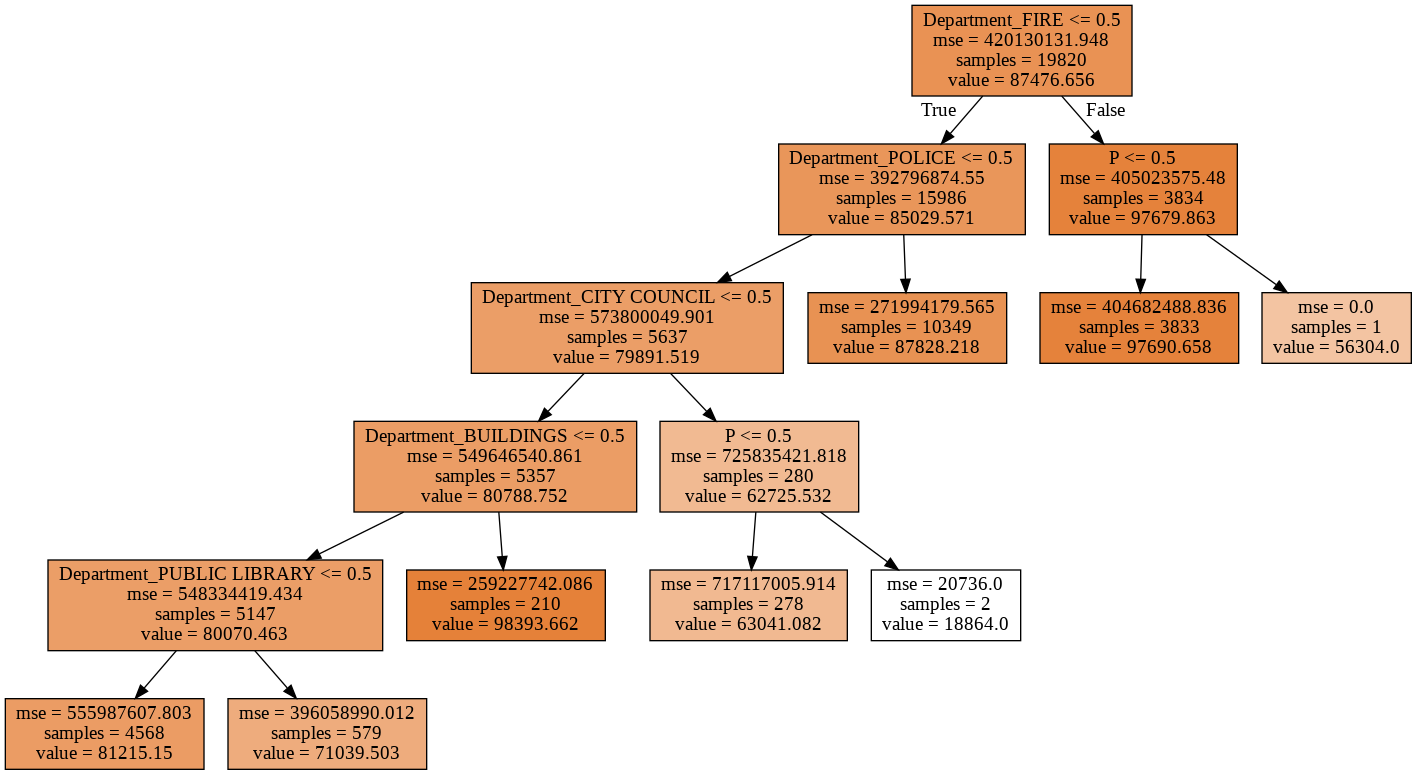

In [0]:
# answer below:

decision_tree = tree.DecisionTreeRegressor(
    criterion='mse',
    max_features=None,
    max_depth=5,
    random_state = 1337
)
decision_tree.fit(X_train, y_train)

dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=[ 'Under 80k', 'Over 80k'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

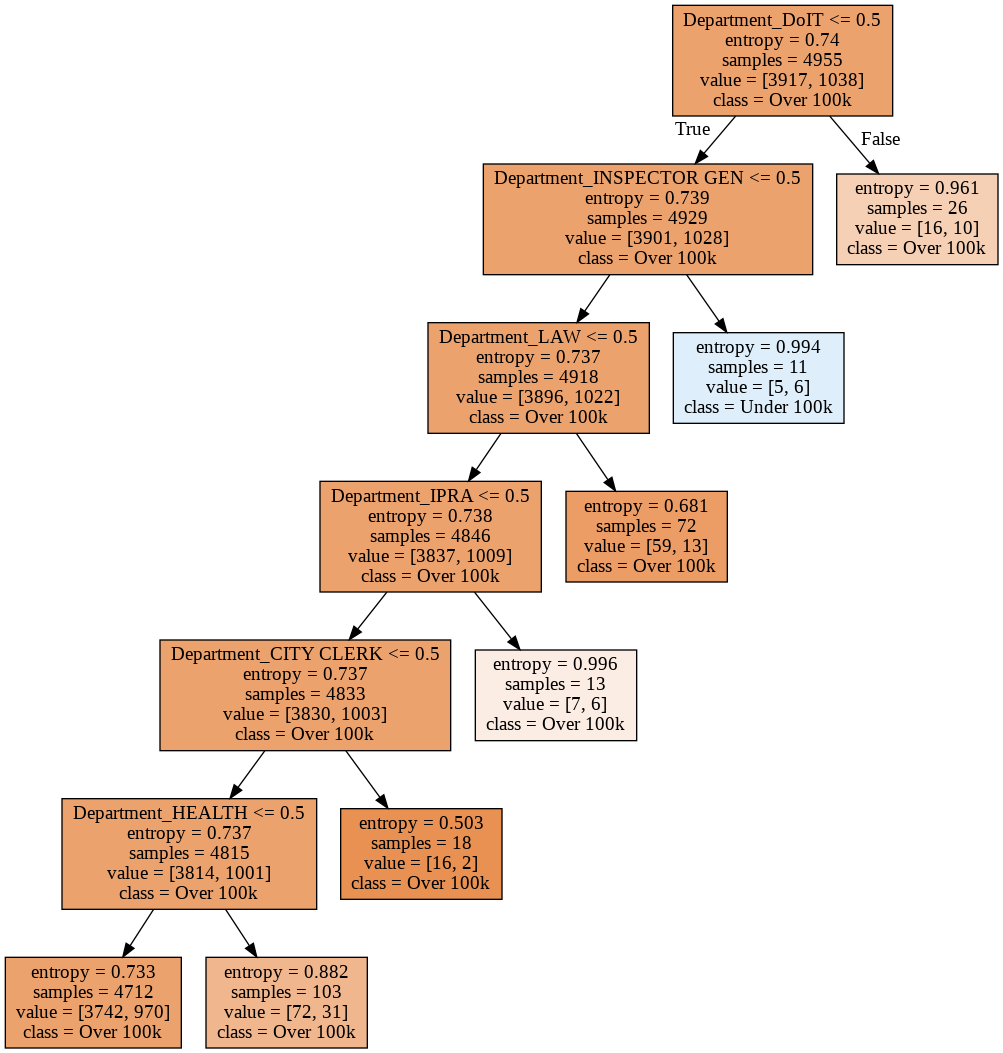

In [0]:
# answer below:

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=2,
    max_depth=6
    # random_state = 1337
)
decision_tree.fit(X_test, y_test)

dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Over 100k', 'Under 100k'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())